In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Term Structure of Interest Rates

In [33]:
def phi_t(a, b, lamda, t):
    phit = a + b*(((1-np.exp(-lamda*t))/(lamda*t))-np.exp(-lamda*t))
    return phit

def Euler_sch(a, b, sigma, alpha, beta, eta, lamda, Nsim, Ntime, x_0, y_0):
    x = np.zeros((Nsim, Ntime+1))
    y = np.zeros((Nsim, Ntime+1))
    r = np.zeros((Nsim, Ntime+1))
    phi = np.zeros((Nsim, Ntime+1))
    phi[:,0] = a
    r[:,0] = a + x_0 + y_0
    x[:,0] = x_0
    y[:,0] = y_0
    dt = 1/252
    t = 0
    # Set initial x_0, y_0
    for i in range(Ntime):
        Z_1 = np.random.standard_normal(Nsim)
        Z_2 = np.random.standard_normal(Nsim)
        t = (i+1)*dt
        x[:,i+1] = x[:,i] - alpha*x[:,i]*dt + sigma*np.sqrt(dt)*Z_1
        y[:,i+1] = y[:,i] - beta*y[:,i]*dt + eta*np.sqrt(dt)*Z_2
        phi[:,i+1] = phi_t(a,b,lamda,t)
        r[:,i+1]= phi[:,i+1] + x[:,i+1] +y[:,i+1]
    Pt0 = np.mean(np.exp(-np.sum(r, axis=1)*dt))
    return x,y,r,Pt0

Set basic parameters

In [34]:
x_0 = -0.005
y_0 = 0.005
alpha = 3
sigma = 0.01
beta = 1
eta = 0.005
a = 0.02
b = 0.05
lamda = 0.75
Ntime = 252*10
Nsim = 1000


x = np.zeros((Nsim, Ntime+1))
y = np.zeros((Nsim, Ntime+1))
r = np.zeros((Nsim, Ntime+1))

x,y,r,pt0 = Euler_sch(a, b, sigma, alpha, beta, eta, lamda, Nsim, Ntime, x_0, y_0)



0.7333741250801424


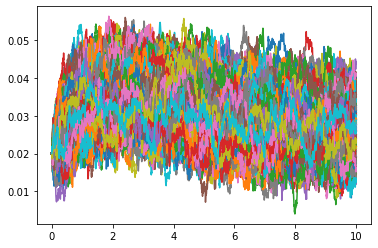

In [38]:
print(pt0)
t = np.linspace(0,10,Ntime+1)
for i in range(Nsim):
    plt.plot(t,r[i,:])
plt.show()

Q3 Use 10000 paths to obtain MC estimate of bond yields

In [125]:
# Simulation Method

def Yields_mat(a, b, sigma, alpha, beta, eta, lamda, Nsim, T, x_0, y_0):
    Pt0 = []
    yt = []
    Ntime = T*12*21
    #dt = 1/252
   # r = np.zeros((Nsim, Ntime+1))
   # r = Euler_sch(a, b, sigma, alpha, beta, eta, lamda, Nsim,Ntime, x_0, y_0)[2]
    #print(r)
    for i in range(T*12):
        length = (i+1)*21
       # data = r[:,length]
       # print(data)
       # print(r[0:Nsim,length].transpose())
        #print(r[:length])
        #pt0 = np.mean(np.sum(r[0:Nsim,length],axis=1))*dt
        pt0 = Euler_sch(a, b, sigma, alpha, beta, eta, lamda, Nsim,length, x_0, y_0)[3]
        Pt0 += [pt0]
        yt += [np.log(1/pt0)/((i+1)/12)]
    
    return Pt0, yt
    


# Analytical Method


In [126]:
x_0 = -0.005
y_0 = 0.005
alpha = 3
sigma = 0.01
beta = 1
eta = 0.005
a = 0.02
b = 0.05
lamda = 0.75
T = 10
Nsim2 = 10000
Pt, yt = Yields_mat(a, b, sigma, alpha, beta, eta, lamda, Nsim2,T, x_0, y_0)


[0.9981550425678944,
 0.9962304568256611,
 0.9941640265888407,
 0.9919761651023311,
 0.9896944020035542,
 0.9873362768133427,
 0.9848537580859862,
 0.9823540877207783,
 0.9797982379701947,
 0.9772347069596932,
 0.9746098000017495,
 0.9718651351907268,
 0.9691601253735472,
 0.9664911494382704,
 0.9637511115770371,
 0.9609467167996955,
 0.9582321682190872,
 0.9554354189316712,
 0.9527393652937615,
 0.949887139018786,
 0.9471511457063658,
 0.94432376456558,
 0.9414931917579824,
 0.9389033435453582,
 0.9361150545143444,
 0.9333535439592371,
 0.9304990599921901,
 0.9277830477525164,
 0.92496487017299,
 0.9222794114961769,
 0.9197148786659073,
 0.9169528464135994,
 0.914183816807392,
 0.9114626700256208,
 0.9089522606988754,
 0.9063605167814207,
 0.9036108355116299,
 0.9010573407179705,
 0.8983541088217315,
 0.8957564933073693,
 0.8934301174379232,
 0.8907935471779168,
 0.8883271324734331,
 0.8856903203415925,
 0.8832769071146049,
 0.8807301957180769,
 0.8781583401762042,
 0.8758095628231193

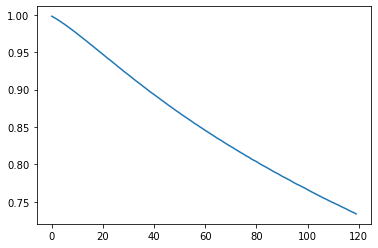

In [127]:
plt.plot(Pt)
Pt

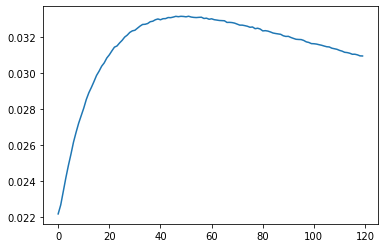

In [128]:
plt.plot(yt)